# Sequential fit

In [1]:
import pymultieis as pym
import numpy as np
import torch

In [2]:
# Load the file containing the frequencies
F = torch.as_tensor(np.load('../../../data/redox_exp_50/freq_50.npy'))
# Load the file containing the admittances (a set of 50 spectra)
Y = torch.as_tensor(np.load('../../../data/redox_exp_50/Y_50.npy'))
# Load the file containing the standard deviation of the admittances
Yerr = torch.as_tensor(np.load('../../../data/redox_exp_50/sigma_Y_50.npy'))

In [3]:
print(F.shape)
print(Y.shape)

torch.Size([45])
torch.Size([45, 50])


In [4]:
def par(a, b):
    """
    Defines the total impedance of two circuit elements in parallel
    """
    return 1/(1/a + 1/b)

def redox(p, f):
    w = 2*torch.pi*f                        # Angular frequency
    s = 1j*w                                # Complex variable
    Rs = p[0]
    Qh = p[1]
    nh = p[2]
    Rct = p[3]
    Wct = p[4]
    Rw = p[5]
    Zw = Wct/torch.sqrt(w) * (1-1j)         # Planar infinite length Warburg impedance
    Zdl = 1/(s**nh*Qh)                      # admittance of a CPE
    Z = Rs + par(Zdl, Rct + par(Zw, Rw))
    Y = 1/Z
    return torch.cat((Y.real, Y.imag), dim = 0)



In [5]:
p0 = torch.as_tensor([1.6295e+02, 3.0678e-08, 9.3104e-01, 1.1865e+04, 4.7125e+05, 1.3296e+06])

bounds = [[1e-15,1e15], [1e-9, 1e2], [1e-1,1e0], [1e-15,1e15], [1e-15,1e15], [1e-15,1e15]]

smf_sigma = torch.as_tensor([1000000., 1000000., 1000000., 1000000., 1000000., 1000000.]) # Smoothing factor used with the standard deviation

smf_modulus = torch.as_tensor([1., 1., 1., 1., 1., 1.]) # Smoothing factor used with the modulus

labels = {"Rs":"$\Omega$", "Qh":"$F^{nh}$", "nh":"-", "Rct":"$\Omega$", "Wct":"$\Omega\cdot s^{-0.5}$", "Rw":"$\Omega$"}


In [6]:
eis_redox_sequential = pym.Multieis(p0, F, Y, bounds, smf_modulus, redox, weight= 'modulus', immittance='admittance')

## 1. Fitting a subset of the sequence

In [7]:
popt, perr, chisqr, chitot, AIC = eis_redox_sequential.fit_sequential(indices=[1, 2, 15, 25, 45])


Using initial
fitting spectra 1

Optimization complete
total time is 0:00:24.320349 

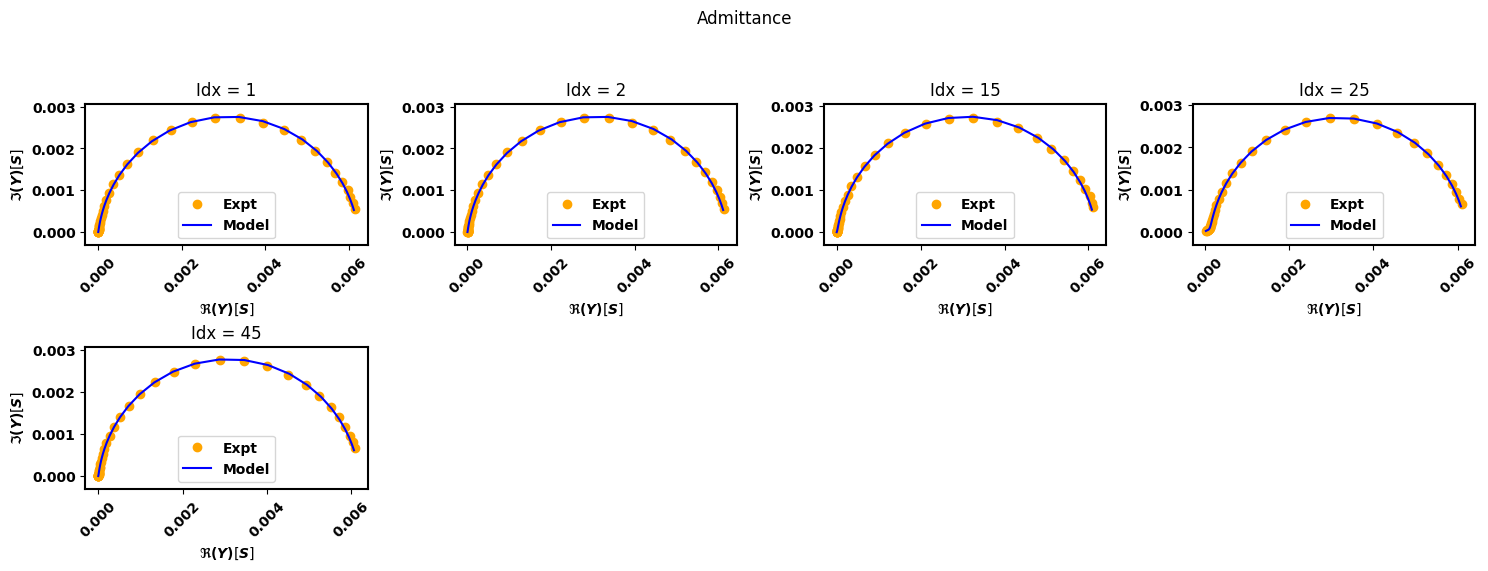

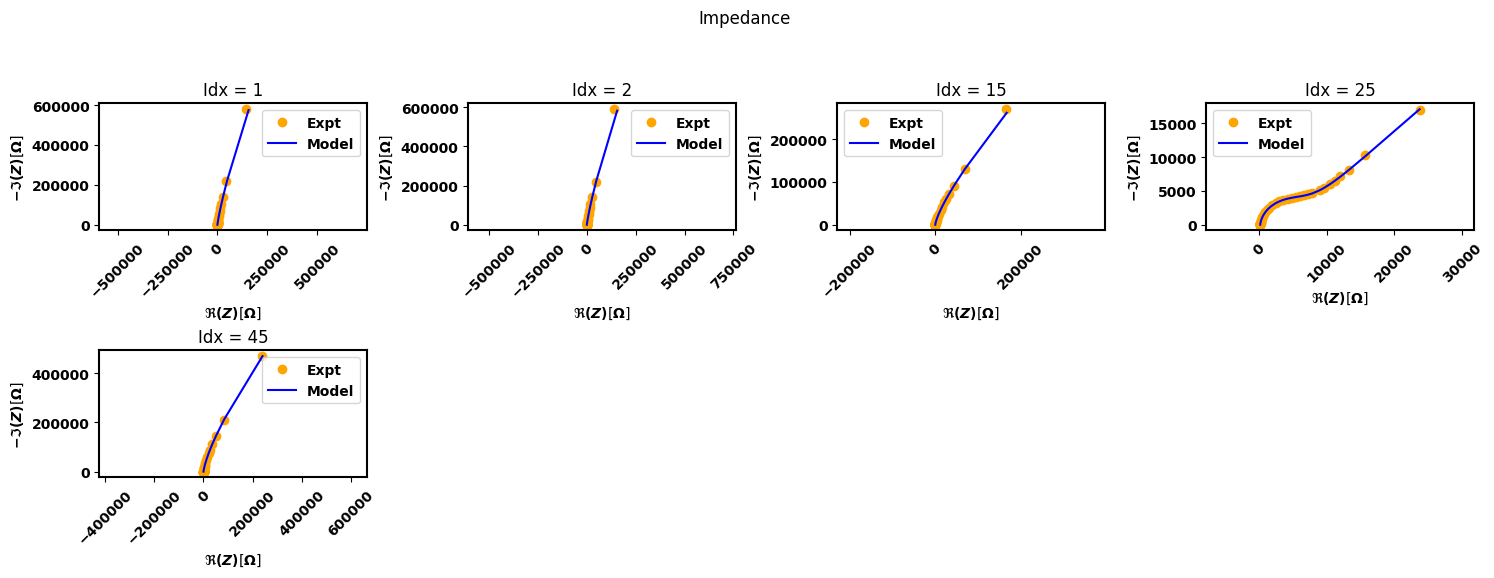

In [8]:
eis_redox_sequential.plot_nyquist()

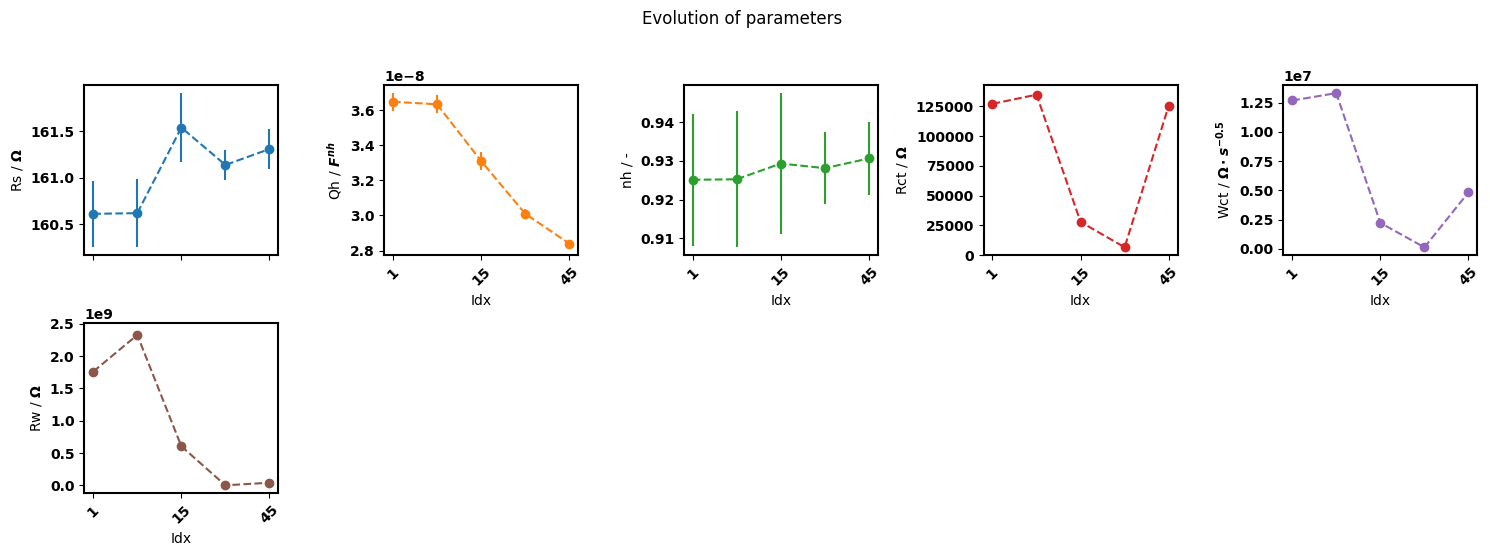

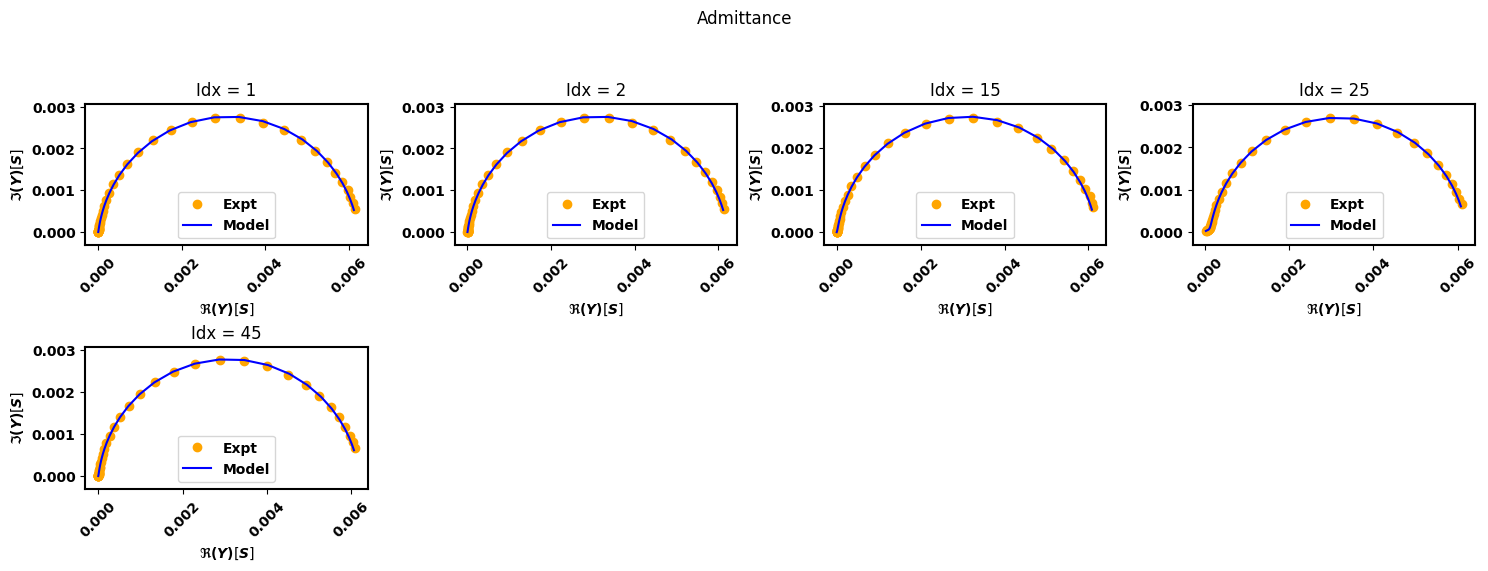

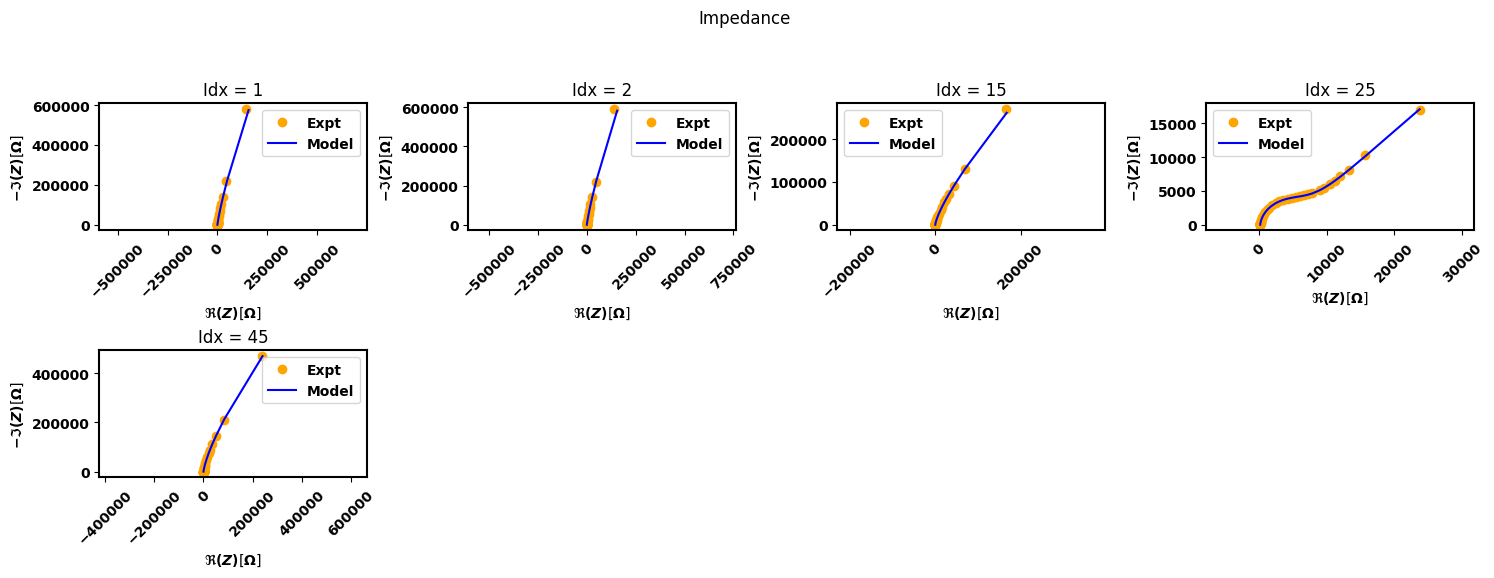

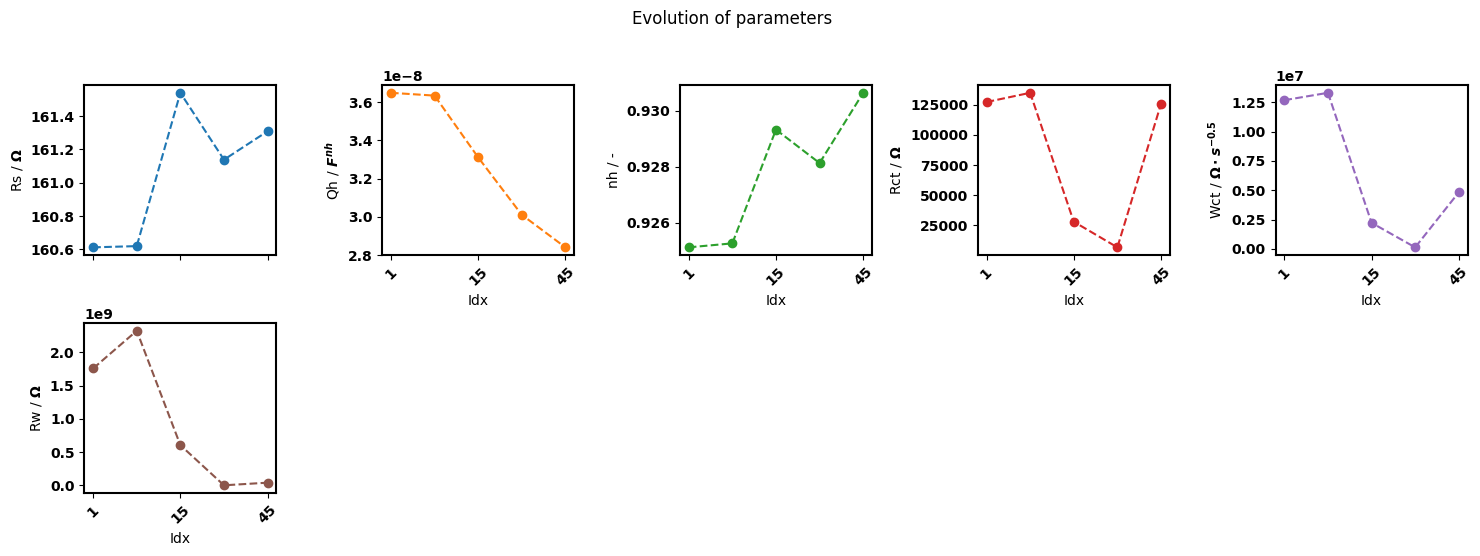

In [9]:
eis_redox_sequential.plot_params(show_errorbar = True, labels = labels)

eis_redox_sequential.plot_nyquist()

eis_redox_sequential.plot_params(False, labels = labels)

## 2. Sequential fit with all spectra


Using initial
fitting spectra 0
fitting spectra 10
fitting spectra 20
fitting spectra 30
fitting spectra 40

Optimization complete
total time is 0:01:29.619987 

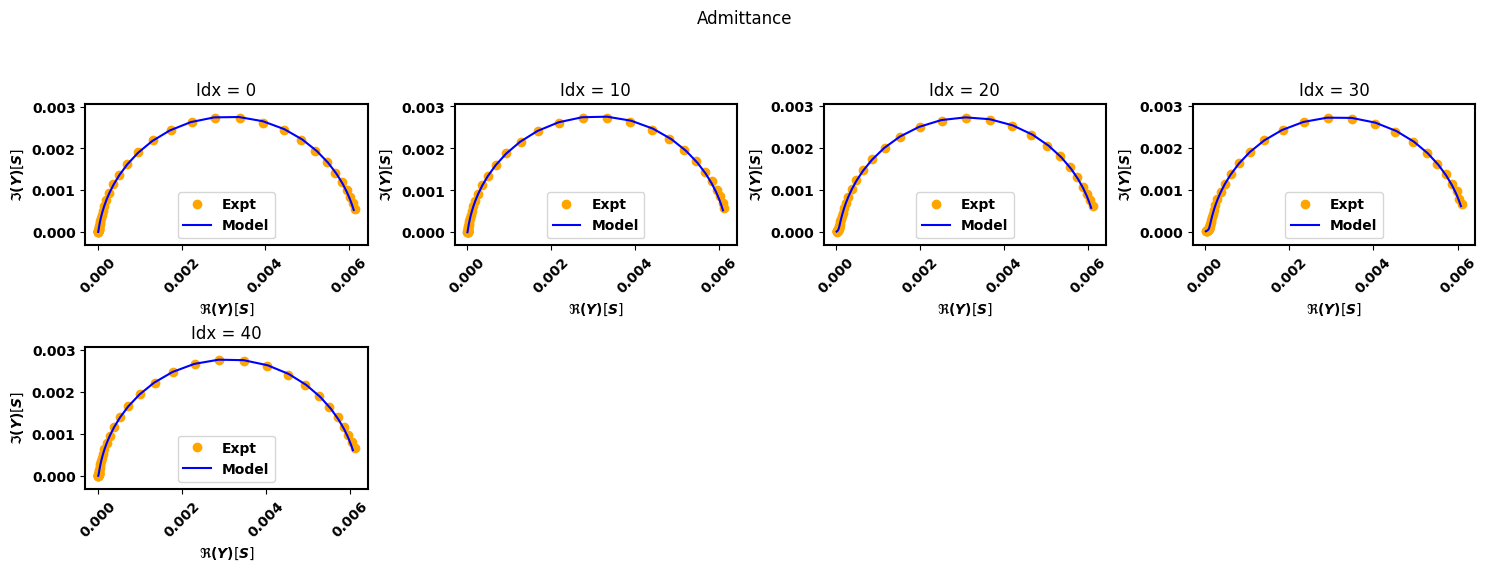

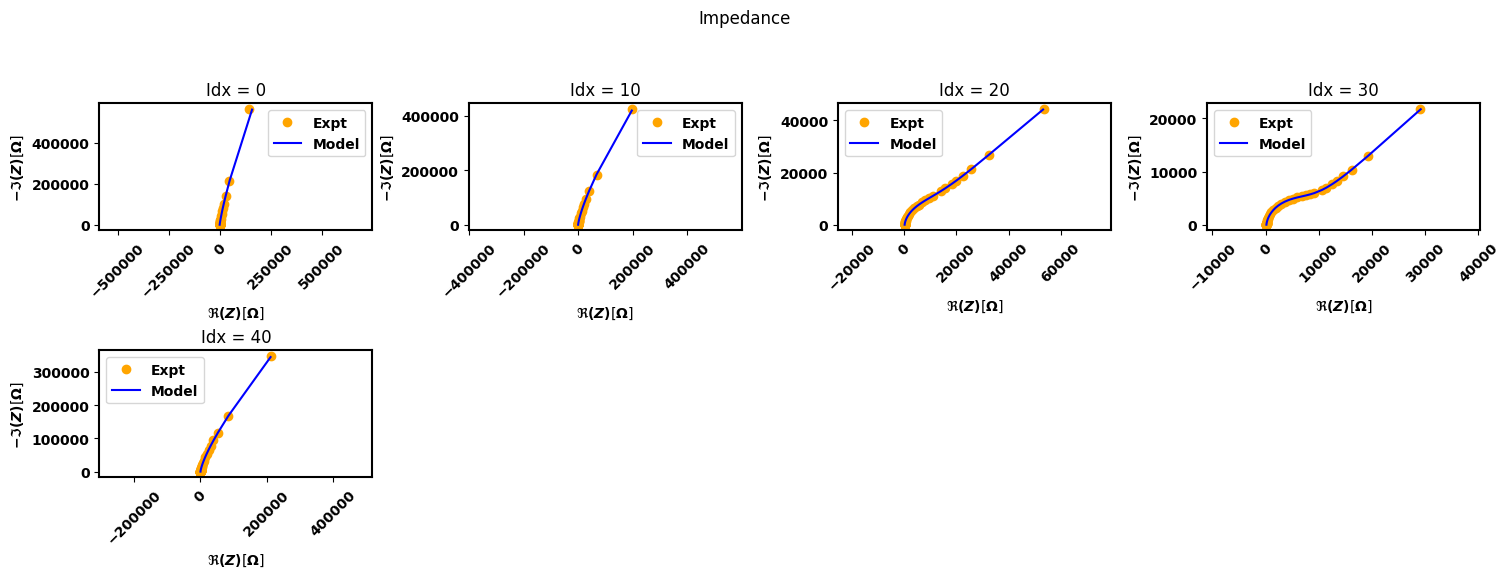

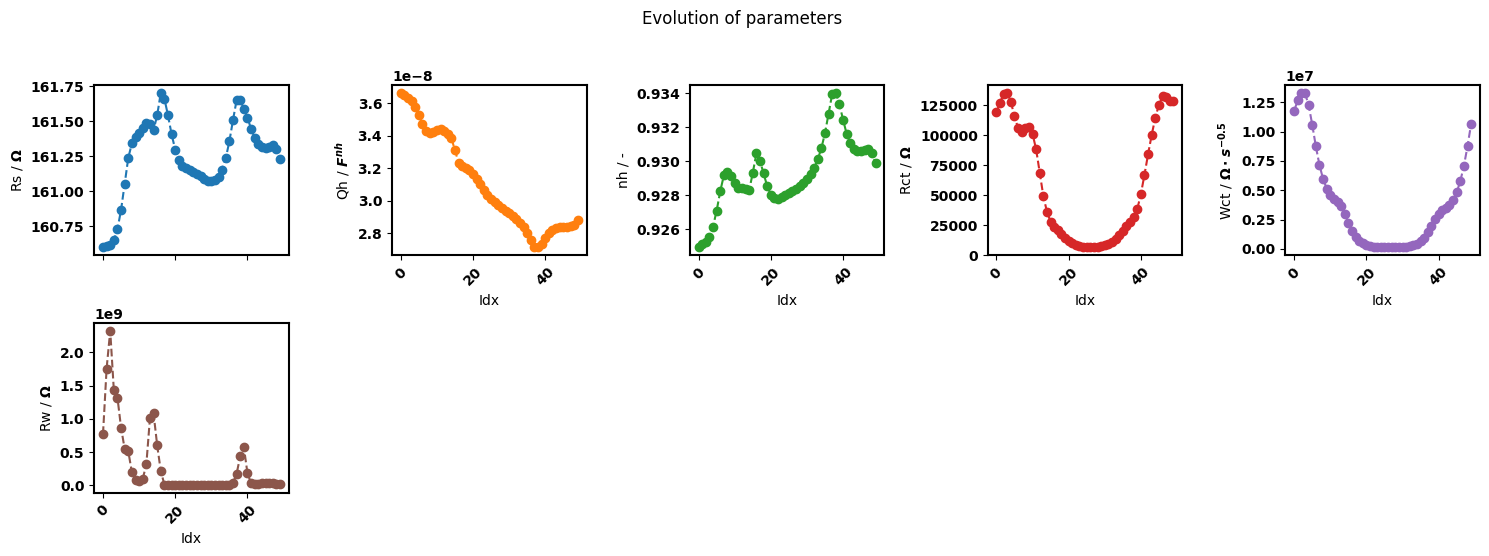

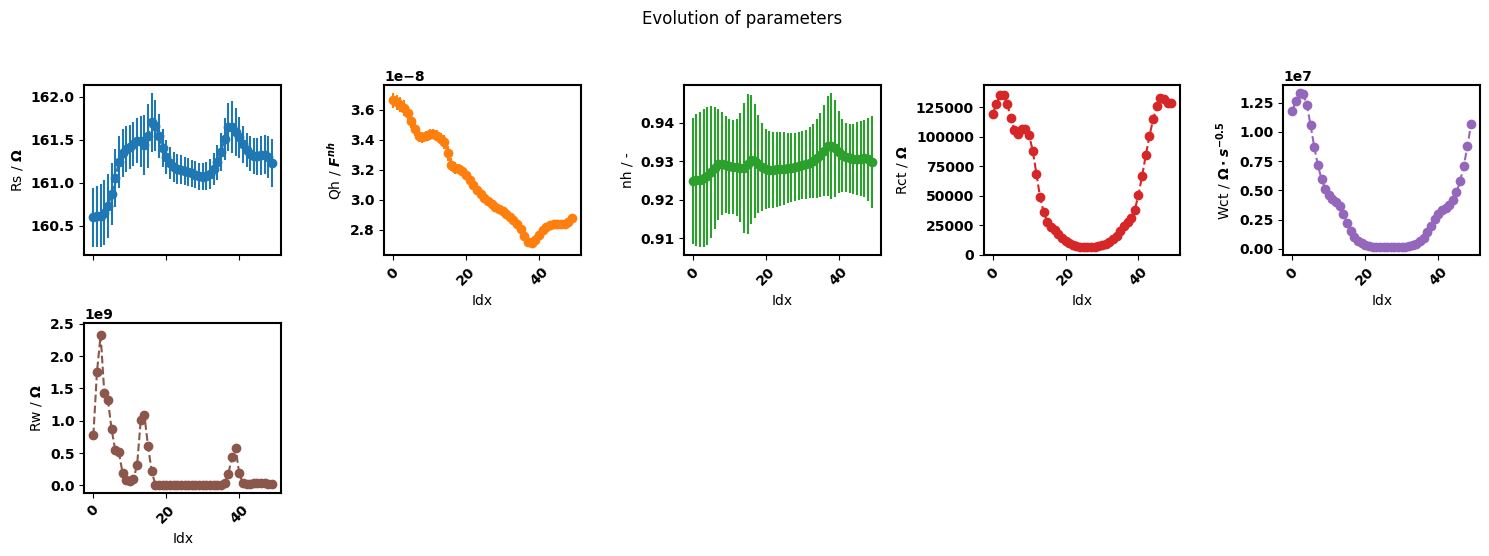

In [10]:
popt, perr, chisqr, chitot, AIC = eis_redox_sequential.fit_sequential(indices=None)
eis_redox_sequential.plot_nyquist(steps = 10)
eis_redox_sequential.plot_params(False, labels = labels)
eis_redox_sequential.plot_params(show_errorbar = True, labels = labels)